# Project Business Statistics: Axis Insurance

**Marks: 60**

## Define Problem Statement and Objectives

## Import all the necessary libraries

In [156]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats



In [157]:
sns.set() #setting the default seaborn style for our plots

## 1.	Explore the dataset and extract insights using Exploratory Data Analysis.

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis


### Reading the Data into a DataFrame

In [158]:
#reading the csv file into a dataframe
df = pd.read_csv('AxisInsurance.csv')

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [4]:
#previewing the first five rows of data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#previewing the last five rows of data
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
#looking at the shape of the dataframe
df.shape

(1338, 7)

- There are 7 columns and 1338 rows.

In [7]:
#checking the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- sex, smoker and region are object data types.  The rest are numeric.

In [144]:
#converting 'object' data types to 'category' type
df.sex = df.sex.astype('category')
df.smoker = df.smoker.astype('category')
df.region = df.region.astype('category')

In [145]:
#verifying datatype updates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [159]:
#check for missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- No missing values.

In [160]:
#check for duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [18]:
df.duplicated().sum()

1

- No duplicates.

In [161]:
#summary statistics for each numerical column
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- Charges range from 1,121 to 63,770 with a mean of 13,270 and standard deviation of 12,110
- Age, BMI and children appear normally distributed with each have similar means and medians.  Charges appears to be skewed to the right with a mean of 
13,270 but a median of 9,382.

In [164]:
#summary values for categorical variables
df.describe(include = ['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


- Top values show male, non-smokers, southeast.
- Majority overall are non-smokers.

### Univariate Analysis

In [44]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [49]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

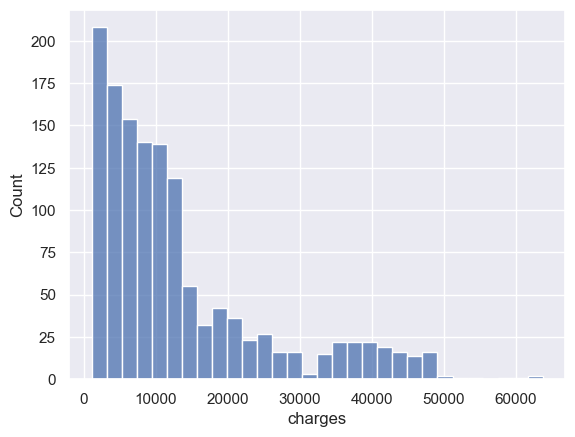

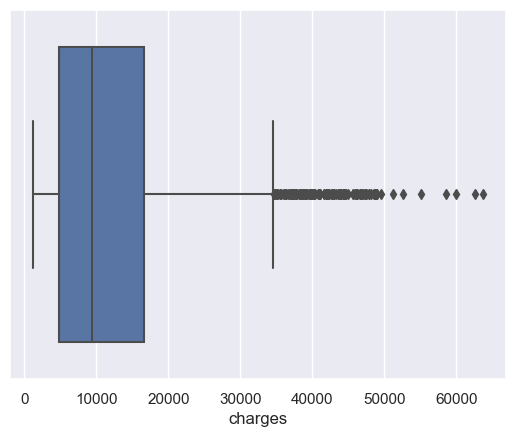

In [166]:
#reviewing the distribution for 'charges'
sns.histplot(data=df, x = 'charges')
plt.show()
sns.boxplot(data = df, x = 'charges')
plt.show()

- Skewed right with a lot of outliers pulling the mean higher.

In [168]:
#determing the number of smokers ('yes') and nonsmokers ('no')
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

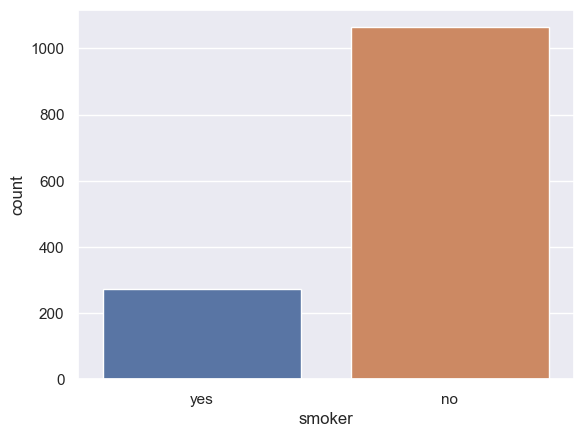

In [169]:
#visiualization of smoker vs nonsmokers
sns.countplot(data = df, x = 'smoker')
plt.show()

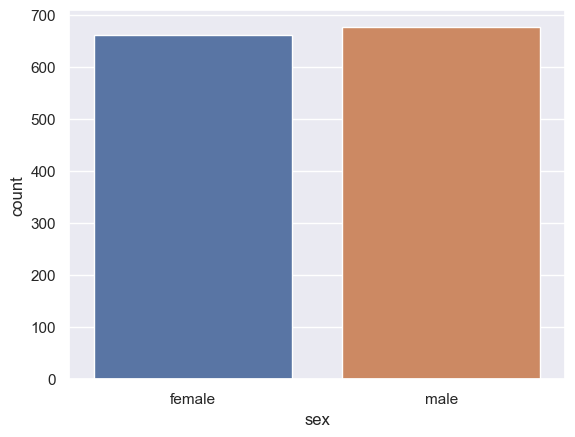

In [170]:
#visualization of sample data by 'sex' (female or male)
sns.countplot(data = df, x = 'sex')
plt.show()

- Male and female counts are about even.

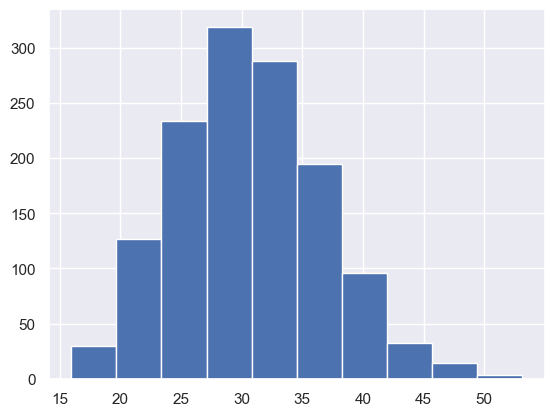

In [171]:
#visualization of 'bmi' values
plt.hist(data = df, x = 'bmi', bins = 10)
plt.show()

- Distribution of bmi is approximately normal

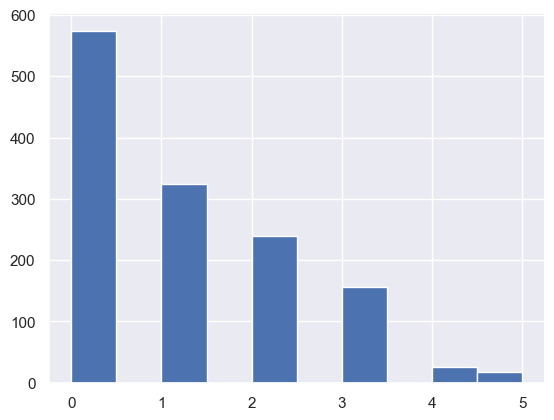

In [172]:
#visualization of number of children by policyholder
plt.hist(data = df, x = 'children')
plt.show()

- Distribution of children is skewed left with most clients having 1 or no children.

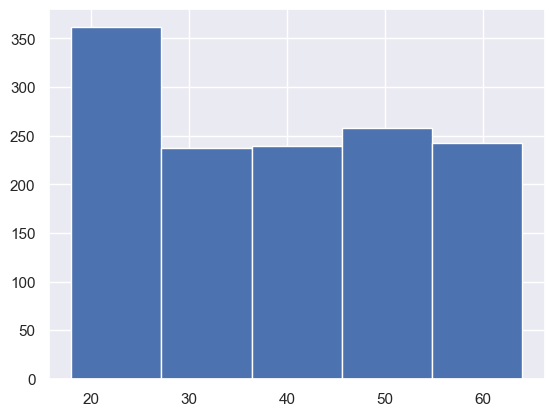

In [173]:
#visualization by age of policholders
plt.hist(data = df, x = 'age', bins = 5)
plt.show()

- Ages 20 to 30 is the largest group.  Over 30 are all about the same counts.

### Bivariate Analysis

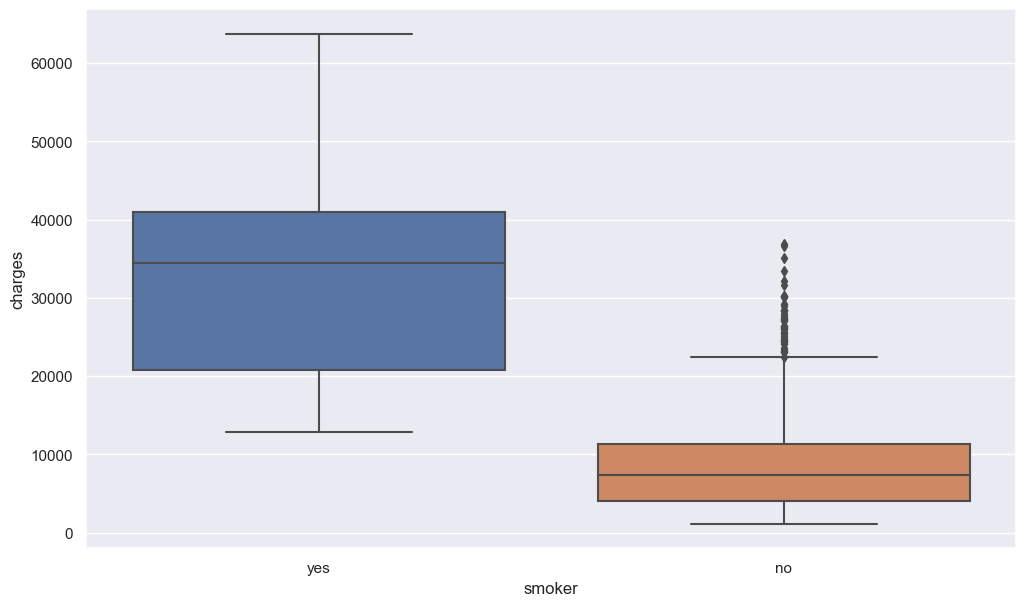

In [174]:
#visualization comparison of charges by smoker versus nonsmoker
plt.figure(figsize = (12,7))
sns.boxplot(data = df, x = 'smoker', y = 'charges')
plt.show()

- smokers have higher charges than non-smokers

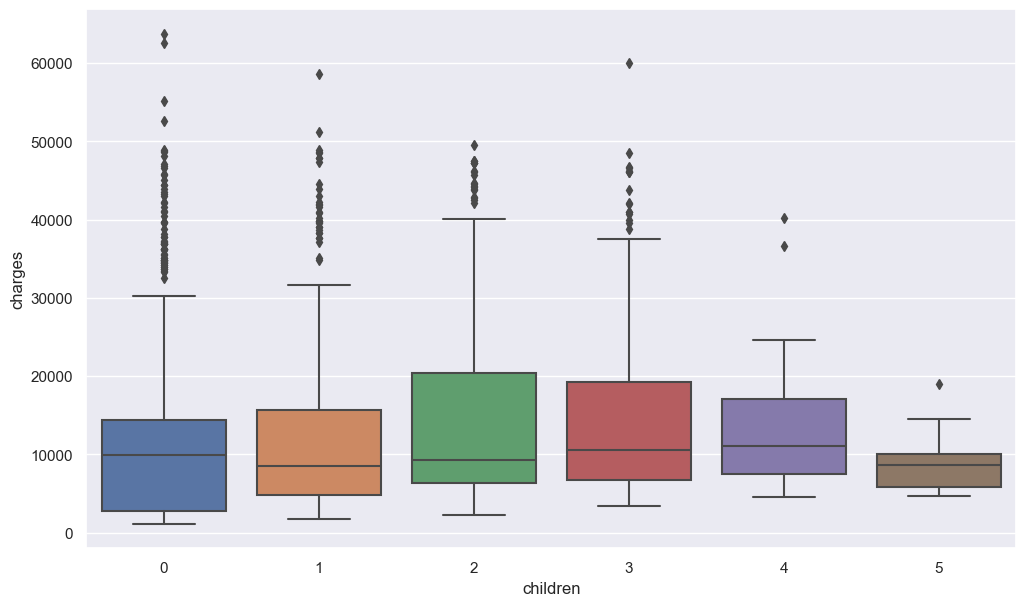

In [175]:
#visualization of charges based on number of children
plt.figure(figsize = (12,7))
sns.boxplot(data = df, x = 'children', y = 'charges')
plt.show()

- charges based on the number of children is similar based on the ranges and medians.  Interestingly, the lowest number of charges and smallest spread is for the largest family category.

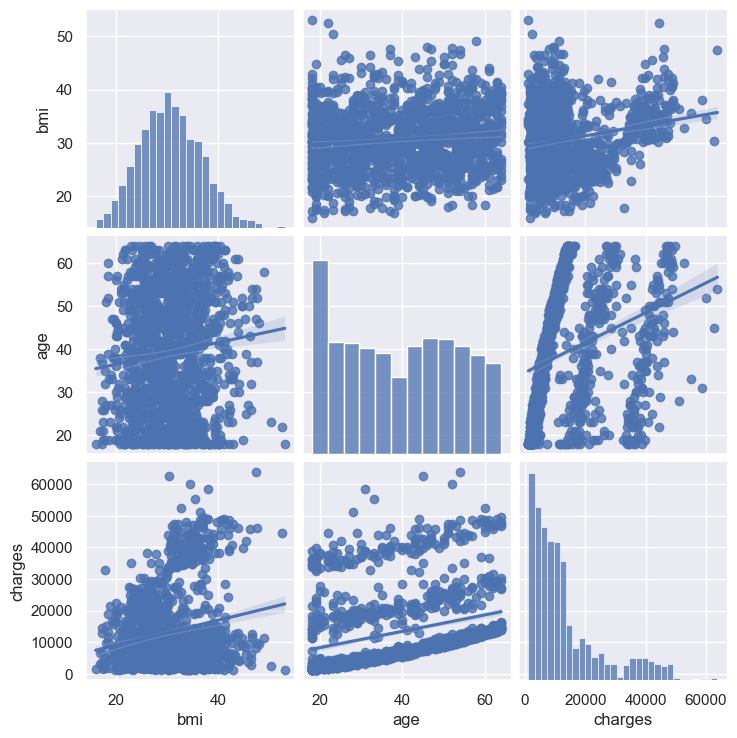

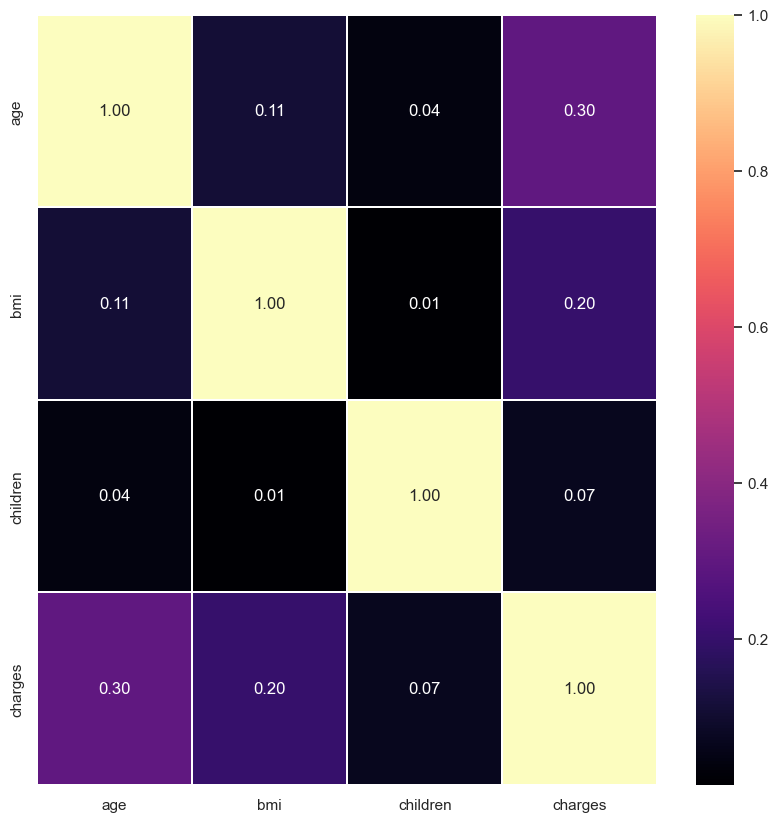

In [176]:
#comparisons of all numerical data
sns.pairplot(df[['bmi', 'age', 'charges']], kind = 'reg')
plt.show()

fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()


- There is very low correlation between any of the attributes.
- Age and charges have the highest correlation at .30, but there is still a similar range of charges at each age level.  

## 2. Prove(or disprove)  that the medical claims made by the people who smoke is greater than those who don't? 

### Perform Visual Analysis

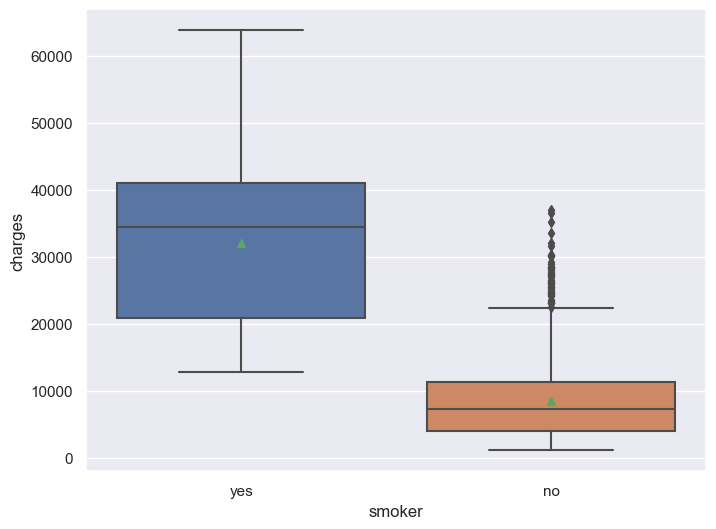

In [177]:
#visualization of charges for smokers vs nonsmokers
plt.figure(figsize=(8,6))
sns.boxplot(x = 'smoker', y = 'charges', showmeans = True, data = df)
plt.show()

- Non-smokers have a lower mean and range of charges than smokers.

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The mean charges between smokers and non-smokers is equal. <br>
$H_a:$ The mean charges of smokers is greater than that of non-smokers
    
Let $\mu_1$ and $\mu_2$ be the mean charges for smokers and non-smokers respectively. Mathematically this can written as:

> $H_0: \mu_1 = \mu_2 \\
H_a: \mu_1 > \mu_2$

### Step 2: Select Appropriate test

This a one-tailed test concerning two population means from two independent populations.  The population standard deviation is not known.  A two-sample independent t-test will be used. 

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [178]:
#separate data for charges of smokers and charges of nonsmokers
smoker = df[df['smoker']=='yes']['charges']
nonsmoker = df[df['smoker']== 'no']['charges']

### Step 5: Calculate the p-value

In [179]:
#use library function to run test and calculate p-value
from scipy.stats import ttest_ind

t, p_value = ttest_ind(smoker, nonsmoker, equal_var = False, alternative = 'greater')

print('tstat = ', t, ", p_value = ", p_value)

tstat =  32.751887766341824 , p_value =  2.94473222335849e-103


### Step 6: Compare the p-value with $\alpha$

In [155]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 2.94473222335849e-103 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw inference $\alpha$

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean charges by smokers is greater than the mean charges of nonsmokers.

## 3. Prove (or disprove) with statistical evidence that BMI of females is different from that of males.

### Perform Visual Analysis

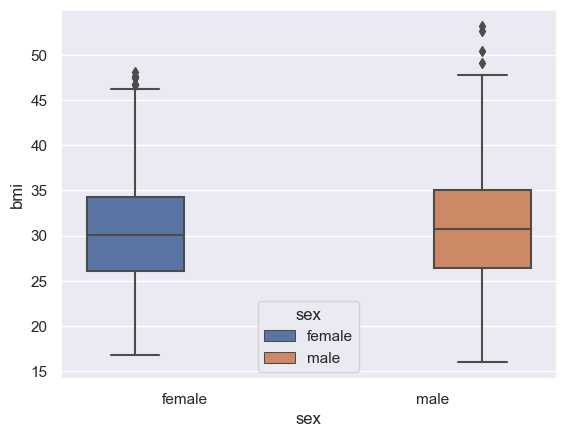

In [180]:
#visualization of 'bmi' by 'sex'
sns.boxplot(data = df, x = 'sex', y = 'bmi', hue = df["sex"]  )
plt.show()

Side-by-side comparison indicates that BMI by sex may be distributed in a very similar way.  Both also appear semetrical, so mean and median should both be around 30 BMI.

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The mean BMI between females and males is equal. <br>
$H_a:$ The mean BMI between females and males is not equal.

Let $\mu_1$ and $\mu_2$ be the mean BMI for femals and males respectively. Mathematically this can written as:

> $H_0:$ $\mu_1$ equals $\mu_2$ <br>
$H_a:$ $\mu_1$ are not equal $\mu_2$

### Step 2: Select Appropriate test

This a two-tailed test concerning two population means from two independent populations.  The population standard deviation is not known.  A two-sample independent t-test will be used. 

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [183]:
#separate 'bmi' data by 'sex'
bmi_female = df[df['sex']=='female']['bmi']
bmi_male = df[df['sex']=='male']['bmi']

### Step 5: Calculate the p-value

In [184]:
#use library function to run test and calculate p-value
from scipy.stats import ttest_ind

t_stat, p_value = stats.ttest_ind(bmi_female, bmi_male)

print('t_stat = ', t, 'p-value = ', p_value)

t_stat =  32.751887766341824 p-value =  0.08997637178984932


### Step 6: Compare the p-value with $\alpha$

In [185]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.08997637178984932 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the mean bmi of women is different than the mean bmi of men.

## 4. Does the smoking habit of customers depend on their region?


### Perform Visual Analysis

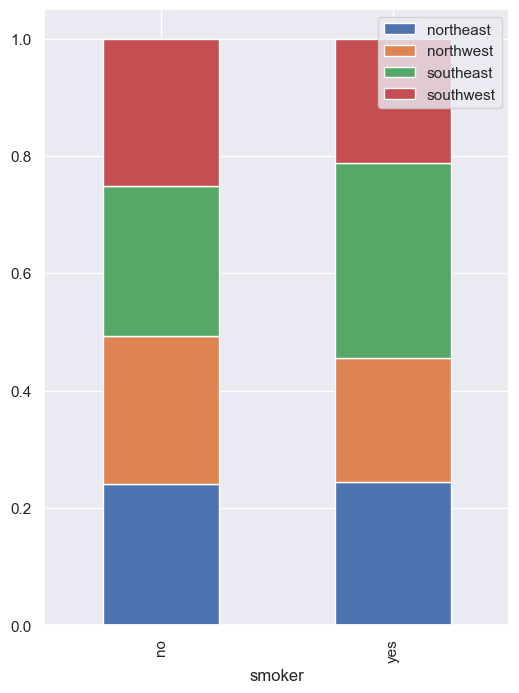

In [186]:
# visual analysis of the dependency between conversion status and preferred langauge
pd.crosstab(df['smoker'],df['region'],normalize='index').plot(kind="bar", figsize=(6,8),
                 stacked=True)
plt.legend()
plt.show()

- The smoker status and region are almost identical proportionally for each region (approximately 25% to each region).
- This observation is only visual, so will run a test to verify.

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The smoker status is independent of the region. <br>
$H_a:$ The smoker status is not independent of the region.

### Step 2: Select Appropriate test

A Chi-square test will be used since we are testing for independence between two categorical variables: smoker and region.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [20]:
# create the contingency table showing the distribution of two categorical variables
contingency_table = pd.crosstab(df['smoker'], df['region'])
contingency_table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


### Step 5: Calculate the p-value

In [21]:
#import the required function
from scipy.stats import chi2_contingency
# use chi2_contingency() to find the p-value
chi_2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.06171954839170547


### Step 6: Compare the p-value with $\alpha$

In [25]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.06171954839170547 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis.  We do not have enough statistical evidence to say that a smokers status depends upon their region.

## 5.	Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

### Perform Visual Analysis

In [187]:
#separating data for 'female' and 'bmi' by number of 'children' (0, 1 or 2)
female_children_0 = df[(df['sex']=='female') & (df['children']==0) & df['bmi']]
female_children_1 = df[(df['sex']=='female') & (df['children']==1) & df['bmi']]
female_children_2 = df[(df['sex']=='female') & (df['children']==2) & df['bmi']]

In [188]:
#combining into one dataframe
female_children_bmi = pd.concat([female_children_0, female_children_1, female_children_2], axis = 0)

<function matplotlib.pyplot.show(close=None, block=None)>

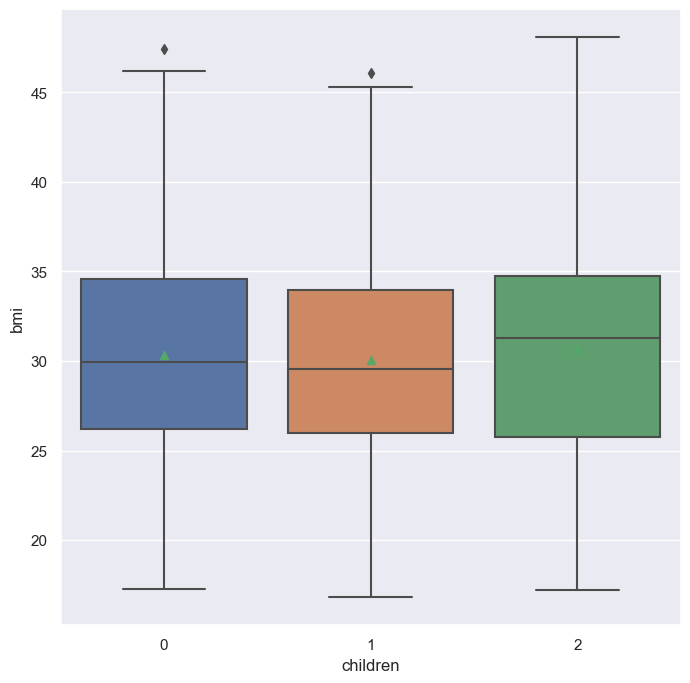

In [189]:
#visualization of 'women', 'bmi' and number of 'children'
plt.figure(figsize=(8,8))


sns.boxplot(x= 'children', y = 'bmi', showmeans = True, data = female_children_bmi)

plt.show


- All distributions appear similar in range and shape.  Women with 2 children however does seemed skewed a little to the right with a higher median and mean.

In [190]:
#mean 'bmi'
female_children_bmi.groupby(['children'])['bmi'].mean()

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The mean BMI of women with zero, one or two children are equal. <br>
$H_a:$ At least one of the mean BMI's of women with zero, one or two children is unequal.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk's test

We will test the null hypothesis

> $H_0:$ The mean BMI's follow a normal distribution.<br>

against the alternative hypothesis.
>$H_a:$ The mean BMI's do not follow a normal distribution.

In [191]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# import the required function
from scipy.stats import shapiro

# find the p-value
b, p_value = stats.shapiro(female_children_bmi['bmi']) 
print('The p-value is', p_value)

The p-value is 0.010868165642023087


The p-value is less than the signifance level which would indicate a decision to reject the null hypothesis.  While normality cannot be assumed now, it does not restrict moving forward with an ANOVA test.  

#### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [128]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(female_children_bmi[female_children_bmi['children']==0]['bmi'],
                            female_children_bmi[female_children_bmi['children']==1]['bmi'],
                            female_children_bmi[female_children_bmi['children']==2]['bmi'])
                           
                                            
# find the p-value
print('The p-value is', p_value)

The p-value is 0.3899432394522804


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [192]:
#separating 'female' and 'bmi' by number of 'children'
female_children_0 = df[(df['sex']=='female') & (df['children']==0) & df['bmi']]
female_children_1 = df[(df['sex']=='female') & (df['children']==1) & df['bmi']]
female_children_2 = df[(df['sex']=='female') & (df['children']==2) & df['bmi']]

### Step 5: Calculate the p-value

In [193]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(female_children_0['bmi'], female_children_1['bmi'],female_children_2['bmi'])
# print the p-value
print('The p-value is', p_value)

The p-value is 0.7158579926754841


### Step 6: Compare the p-value with $\alpha$

In [194]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.7158579926754841 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the mean bmi for females differs by the number of children they have (0, 1 or 2) to any meaningful degree.

## Conclusion and Business Recommendations

Medical claims by smokers are higher than nonsmokers
- If not already, higher premiums should be charged to smokers to offset the additional cost they create.

BMI does not differ between females and males.
- BMI would not be a basis to set policy rates differently by sex.

Smoking habits do not depend upon region.
- Planning and strategy differently at the regional level based on smoker status is not necessary.

Women who have between zero to two children do not have a difference in mean BMI.
- While there are some small differences in the data, there is no significant difference in the mean BMI for women who have no children, one child or two children.